In [13]:
%matplotlib inline

import pandas
import sklearn.metrics
import statistics
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from io import StringIO
from IPython.display import Image
import pydotplus


In [14]:
# bug fix for display formats to avoid run time errors
pandas.set_option('display.float_format', lambda x:'%.2f'%x)

#load the data
data = pandas.read_csv('..\separatedData.csv')

# convert to numeric format
data["breastCancer100th"] = pandas.to_numeric(data["breastCancer100th"], errors='coerce')
data["meanFoodPerson"]   = pandas.to_numeric(data["meanFoodPerson"], errors='coerce')
data["meanCholesterol"]   = pandas.to_numeric(data["meanCholesterol"], errors='coerce')

# listwise deletion of missing values
sub1 = data[['breastCancer100th', 'meanFoodPerson', 'meanCholesterol']].dropna()

# Create the conditions to a new variable named sugar_consumption that will categorize the meanSugarPerson answers
meanIncidence = statistics.mean(sub1['breastCancer100th'])

def incidence_cancer (row):
    if row['breastCancer100th'] <= meanIncidence : return 0   # Incidence of breast cancer is below the average of the incidence of all countries.
    if row['breastCancer100th'] > meanIncidence  : return 1   # incidence of breast cancer is above the average of the incidence of all countries.

# Add the new variable sugar_consumption to subData
sub1['incidence_cancer'] = sub1.apply (lambda row: incidence_cancer (row),axis=1)

# Create the conditions to a new variable named food_consumption that will categorize the meanFoodPerson answers
meanFood = statistics.mean(sub1['meanFoodPerson'])

def food_consumption (row):
    if row['meanFoodPerson'] <= meanFood : return 0   # food consumption below the average of the food consumption of all countries.
    if row['meanFoodPerson'] > meanFood  : return 1   # food consumption above the average of the food consumption of all countries.

# Add the new variable food_consumption to subData
sub1['food_consumption'] = sub1.apply (lambda row: food_consumption (row),axis=1)

# Create the conditions to a new variable named cholesterol_blood that will categorize the meanCholesterol answers
def cholesterol_blood (row):

   if row['meanCholesterol'] <= 5.2 : return 0         # (0) Desirable below 5.2 mmol/L
   if 5.2 < row['meanCholesterol'] <= 6.2 : return 1   # (1) Borderline high between 5.2 and 6.2 mmol/L
   if row['meanCholesterol'] > 6.2 : return 2          # (2) High above 6.2 mmol/L

# Add the new variable sugar_consumption to subData
sub1['cholesterol_blood'] = sub1.apply (lambda row: cholesterol_blood (row),axis=1)

In [15]:
"""
Modeling and Prediction
"""
#Split into training and testing sets
predictors = sub1[['food_consumption', 'cholesterol_blood']]
targets = sub1['incidence_cancer']

#Train = 60%, Test = 40%
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

#Build model on training data
classifier=DecisionTreeClassifier()
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

cmatrix = sklearn.metrics.confusion_matrix(tar_test, predictions)
accuracy = sklearn.metrics.accuracy_score(tar_test, predictions)
print(cmatrix)
print(accuracy)

[[39  1]
 [ 5  7]]
0.884615384615


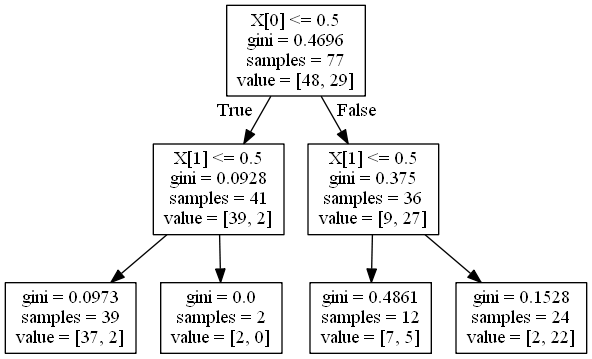

In [16]:
#Displaying the decision tree
out = StringIO()
tree.export_graphviz(classifier, out_file=out)
graph = pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())